# Clustering

## KMeans

### Initilizing Libraries

In [112]:
#initializing the libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.patches as mpatches
from sklearn.metrics import silhouette_score

### Loading in the Data Frames needed

In [113]:
#Importing the dataset from the PCA section
df = pd.read_csv('C:/Users/ryhen/OneDrive - UCB-O365/Machine Learning/Project/Part 2/PCA/PCA_3.csv')
df

,PCA1,PCA2,PCA3,rank
0,2.090918,-3.181196,-2.669214,1
1,-0.381021,0.052100,-1.569145,1
2,-1.800961,-0.788761,-0.012953,1
3,-3.222997,-0.907255,-0.832984,1
4,0.772457,2.434955,-0.486496,1
...,...,...,...,...
115,1.436189,-0.362798,4.319361,5
116,3.298162,-4.710600,1.565845,5
117,1.447785,0.056472,0.846098,5
118,-0.448996,-0.020773,1.806847,5


### Removing the label from the df to conduct kmeans

In [114]:
data = df[['PCA1', 'PCA2', 'PCA3']]
data

,PCA1,PCA2,PCA3
0,2.090918,-3.181196,-2.669214
1,-0.381021,0.052100,-1.569145
2,-1.800961,-0.788761,-0.012953
3,-3.222997,-0.907255,-0.832984
4,0.772457,2.434955,-0.486496
...,...,...,...
115,1.436189,-0.362798,4.319361
116,3.298162,-4.710600,1.565845
117,1.447785,0.056472,0.846098
118,-0.448996,-0.020773,1.806847


### Conducting silhouette analysis to know the proper number of clusters to perform

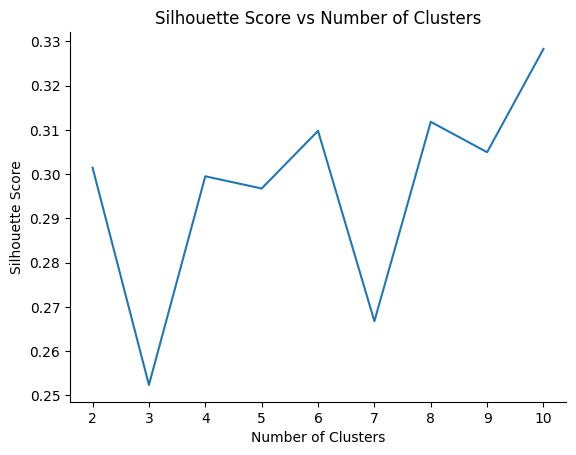

In [115]:
#creating a list to store the silhouette scores
silhouette_scores = []

#creating a list of the number of clusters going from 2-10
n_clusters = np.arange(2, 11)

#looping through the number of clusters

for n in n_clusters:
    kmeans = KMeans(n_clusters = n, random_state = 0)
    kmeans.fit(data)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(data, labels)
    silhouette_scores.append(silhouette_avg)

#plotting the silhouette scores
import matplotlib.pyplot as plt
plt.plot(n_clusters, silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
#remove the top and right borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()



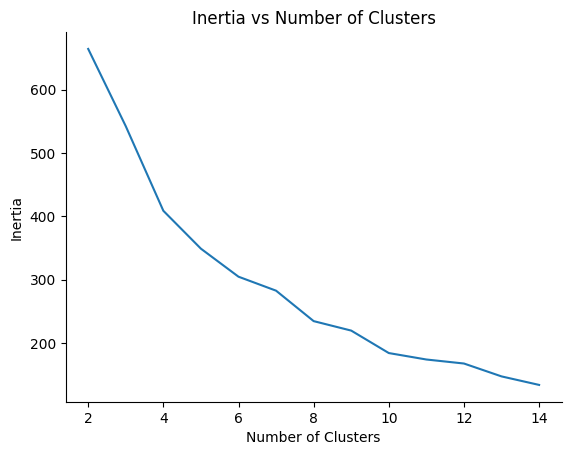

In [116]:
#creating a list to store the inertia values
inertia_values = []

#creating a list of the number of clusters going from 2-10
n_clusters = np.arange(2, 15)

#looping through the number of clusters
for n in n_clusters:
    kmeans = KMeans(n_clusters = n, random_state = 0)
    kmeans.fit(data)
    inertia_values.append(kmeans.inertia_)

#plotting the inertia values
import matplotlib.pyplot as plt
plt.plot(n_clusters, inertia_values)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters')
#remove the top and right borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()



### From our Silhouette Scores we will set our clusters to 6,8, and 10.

### First being 6

#### Plotting on a 3-D graph, showing just the 6 clusters and the centroids

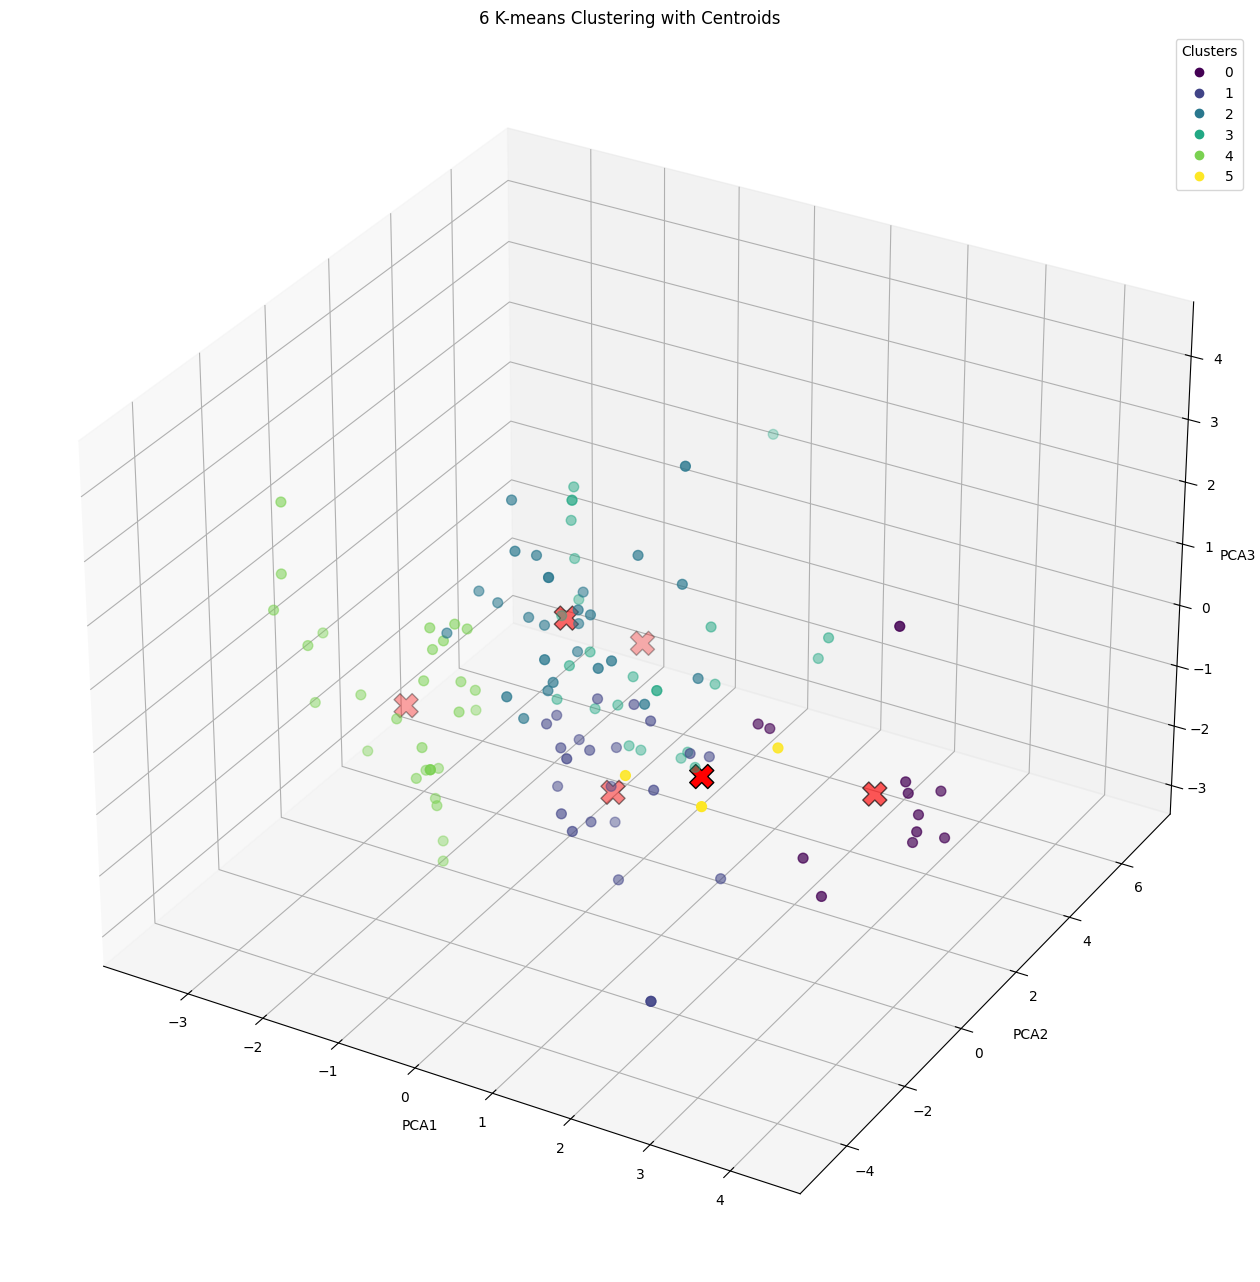

In [127]:
# Fit KMeans with 8 clusters
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(data[['PCA1', 'PCA2', 'PCA3']])
labels = kmeans.predict(data[['PCA1', 'PCA2', 'PCA3']])
centroids = kmeans.cluster_centers_

# Plotting the clusters in 3D
fig = plt.figure(figsize=(16, 20))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the data points, coloring by rank
scatter = ax.scatter(data['PCA1'], data['PCA2'], data['PCA3'], c=labels, cmap='viridis', s=50)

# Scatter plot for the centroids, making them larger and distinct in color
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], 
           c='red', s=300, marker='X', edgecolor='black', label='Centroids')

# Label the axes
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title('6 K-means Clustering with Centroids')

# Create a legend
legend_elements = [mpatches.Patch(label='Centroids', color='red')]
ax.legend(handles=legend_elements)

#add the clusters to the legend
plt.legend(*scatter.legend_elements(), title='Clusters')



plt.show()

#### Showing how Ranks are related to these clustered centroids

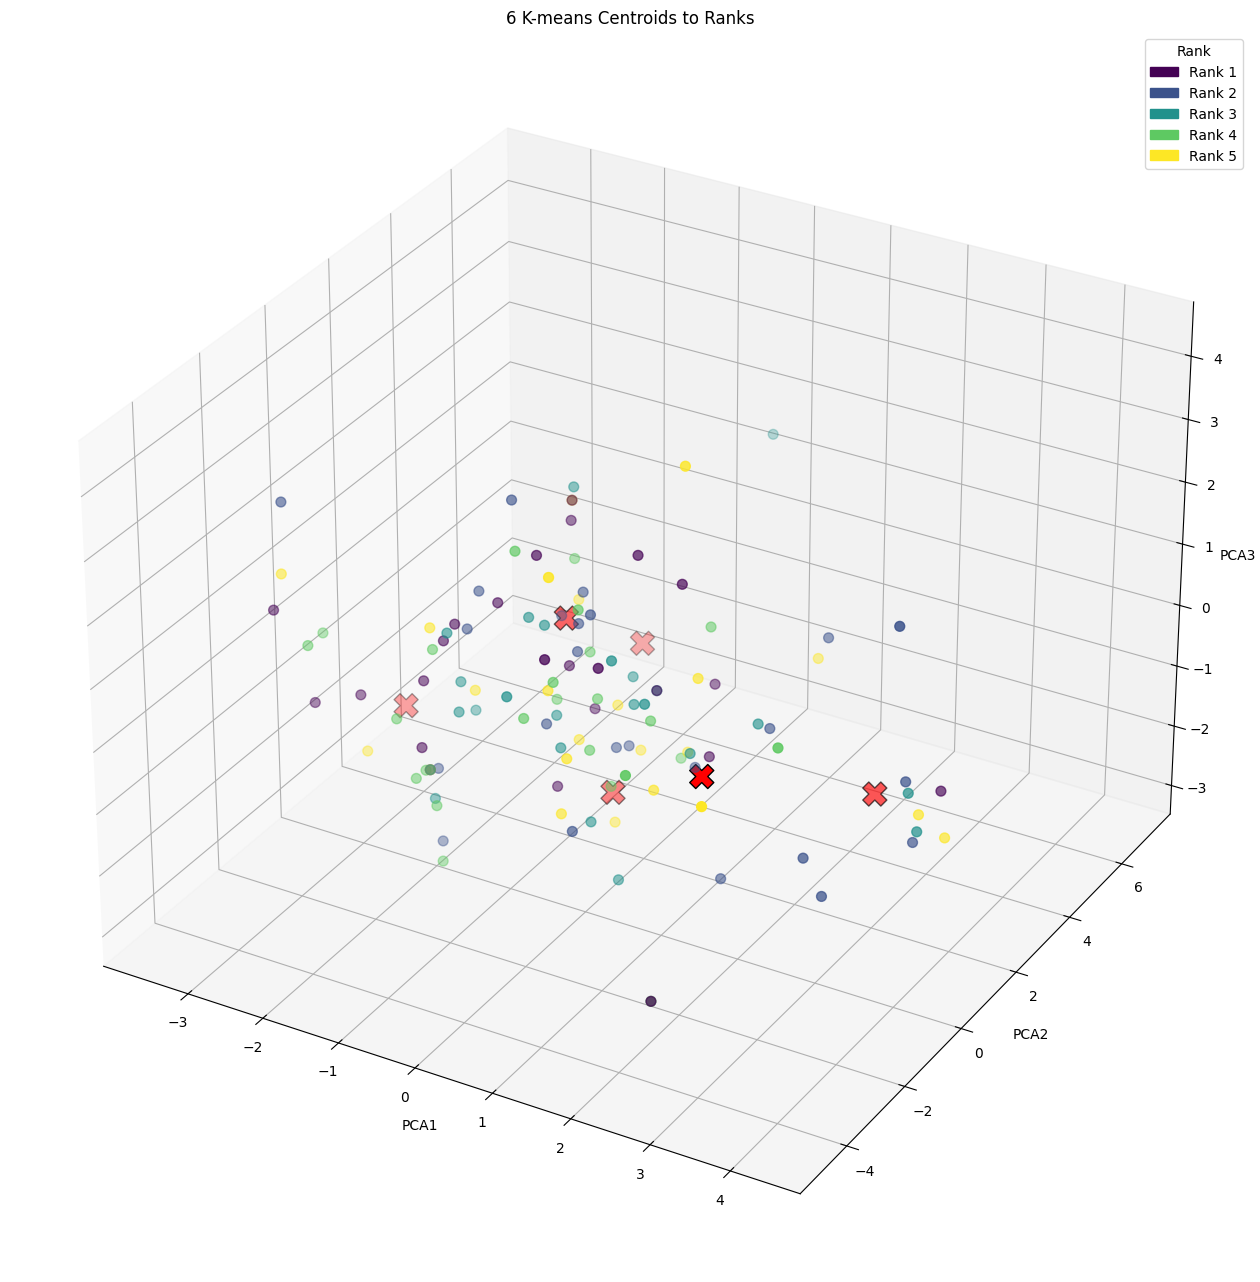

In [128]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib as mpl
import matplotlib.patches as mpatches

# Fit KMeans with 6 clusters
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(data[['PCA1', 'PCA2', 'PCA3']])
labels = kmeans.predict(data[['PCA1', 'PCA2', 'PCA3']])
centroids = kmeans.cluster_centers_

# Define the ranks (assumed to be in 'rank' column in df)
ranks = df['rank'].unique()

# Plotting the clusters in 3D
fig = plt.figure(figsize=(16, 20))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the data points, coloring by rank
scatter = ax.scatter(data['PCA1'], data['PCA2'], data['PCA3'], c=df['rank'], cmap='viridis', s=50)

# Scatter plot for the centroids, making them larger and distinct in color
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], 
           c='red', s=300, marker='X', edgecolor='black', label='Centroids')

# Label the axes
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title('6 K-means Centroids to Ranks')

# Add a color bar for ranks
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Rank')

# Manually create legend patches based on unique ranks and corresponding colors from colormap
cmap = plt.cm.viridis
norm = mpl.colors.Normalize(vmin=min(df['rank']), vmax=max(df['rank']))

# Create custom legend entries for each rank
legend_patches = [mpatches.Patch(color=cmap(norm(rank)), label=f'Rank {rank}') for rank in ranks]

# Add a legend for ranks
ax.legend(handles=legend_patches, title="Rank", loc='upper right')

#remove the color bar
cbar.remove()

plt.show()


### Next we will do this with 8 Clusters

#### Plotting on a 3-D graph, showing just the 8 clusters and the centroids

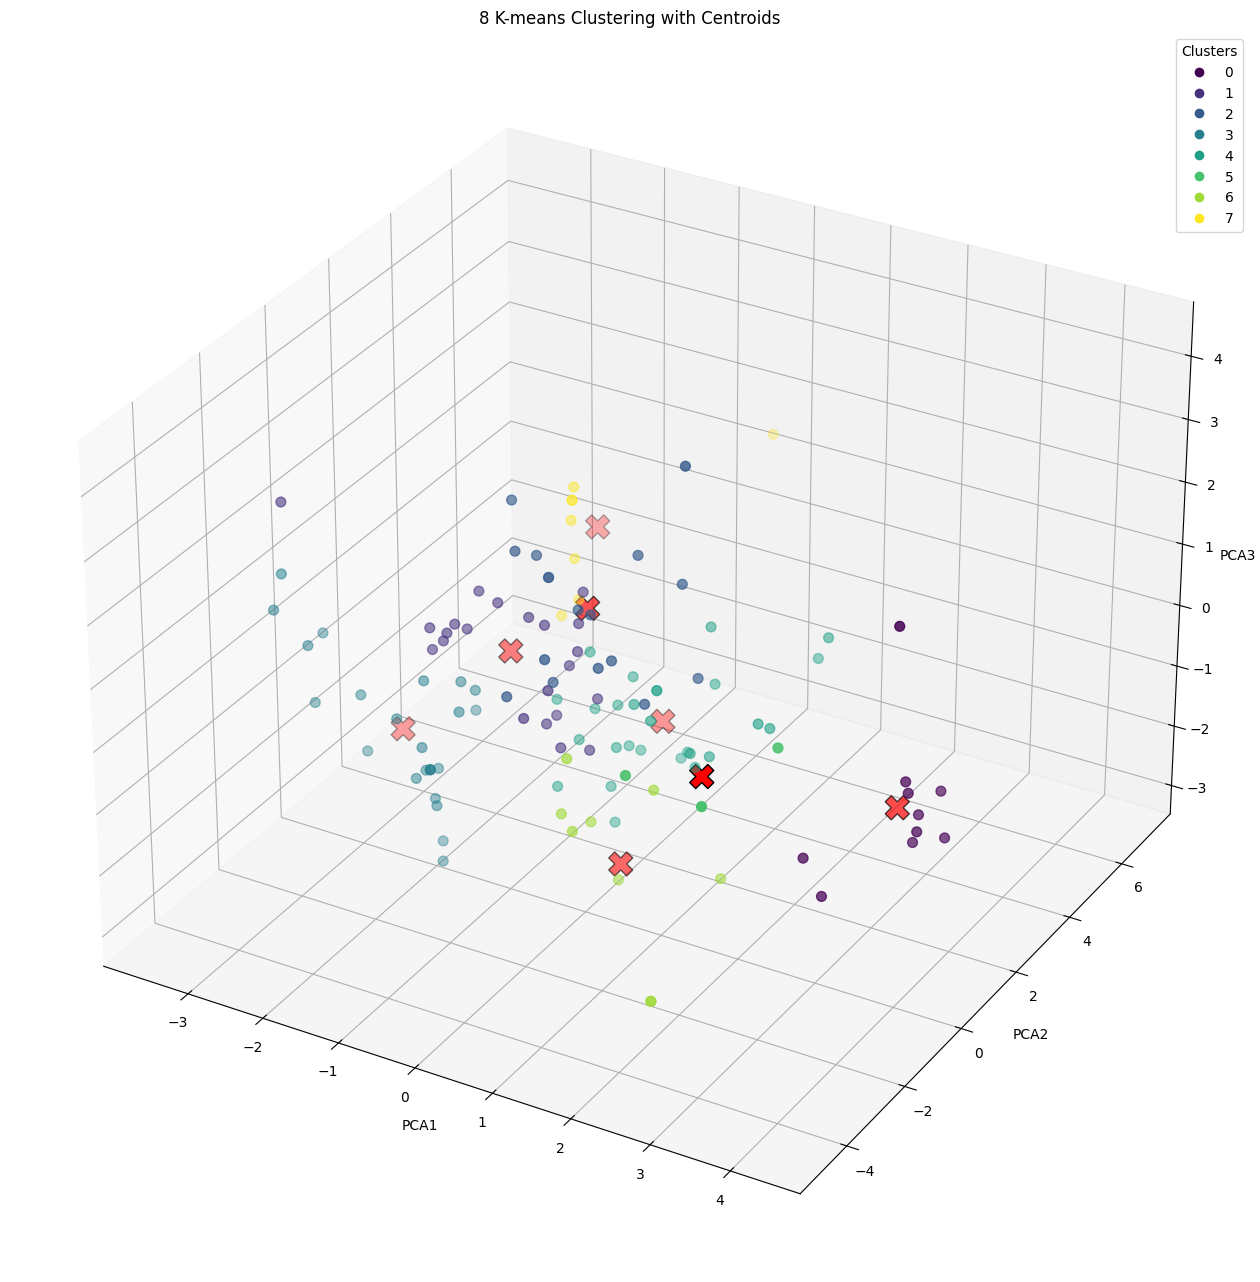

In [129]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib as mpl
import matplotlib.patches as mpatches

# Fit KMeans with 8 clusters
kmeans = KMeans(n_clusters=8, random_state=0)
kmeans.fit(data[['PCA1', 'PCA2', 'PCA3']])
labels = kmeans.predict(data[['PCA1', 'PCA2', 'PCA3']])
centroids = kmeans.cluster_centers_

# Plotting the clusters in 3D
fig = plt.figure(figsize=(16, 20))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the data points, coloring by rank
scatter = ax.scatter(data['PCA1'], data['PCA2'], data['PCA3'], c=labels, cmap='viridis', s=50)

# Scatter plot for the centroids, making them larger and distinct in color
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], 
           c='red', s=300, marker='X', edgecolor='black', label='Centroids')

# Label the axes
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title('8 K-means Clustering with Centroids')

# Create a legend
legend_elements = [mpatches.Patch(label='Centroids', color='red')]
ax.legend(handles=legend_elements)

#add the clusters to the legend
plt.legend(*scatter.legend_elements(), title='Clusters')



plt.show()

#### Showing how Ranks are related to these clustered centroids

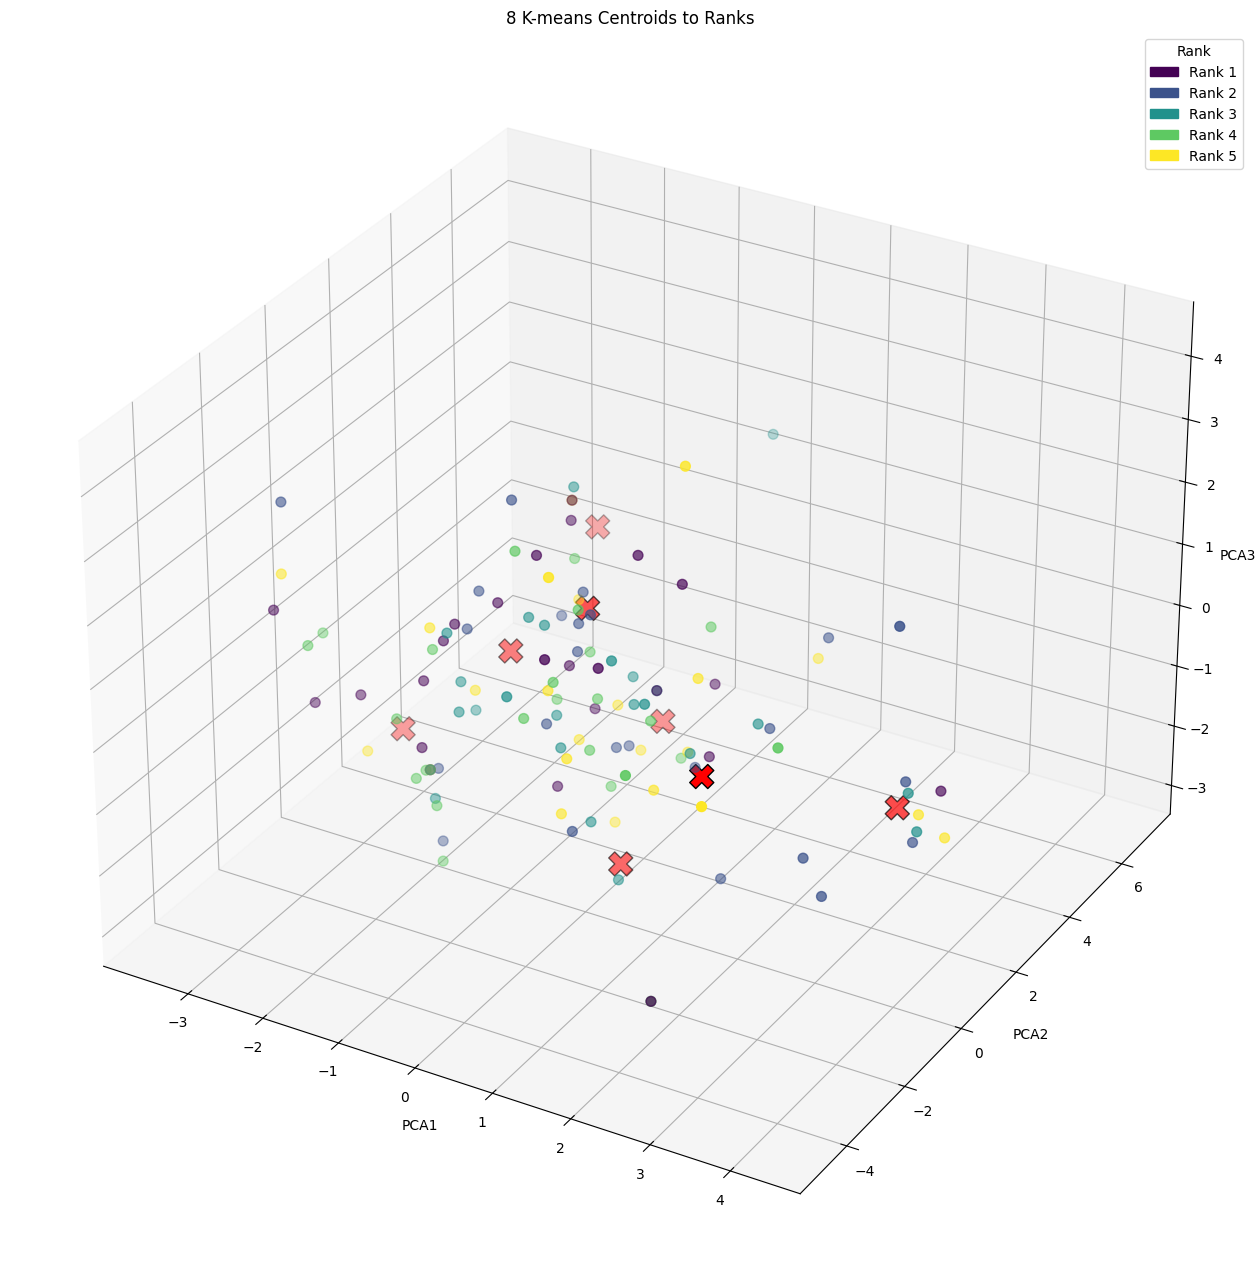

In [130]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib as mpl
import matplotlib.patches as mpatches

# Fit KMeans with 8 clusters
kmeans = KMeans(n_clusters=8, random_state=0)
kmeans.fit(data[['PCA1', 'PCA2', 'PCA3']])
labels = kmeans.predict(data[['PCA1', 'PCA2', 'PCA3']])
centroids = kmeans.cluster_centers_

# Define the ranks (assumed to be in 'rank' column in df)
ranks = df['rank'].unique()

# Plotting the clusters in 3D
fig = plt.figure(figsize=(16, 20))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the data points, coloring by rank
scatter = ax.scatter(data['PCA1'], data['PCA2'], data['PCA3'], c=df['rank'], cmap='viridis', s=50)

# Scatter plot for the centroids, making them larger and distinct in color
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], 
           c='red', s=300, marker='X', edgecolor='black', label='Centroids')

# Label the axes
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title('8 K-means Centroids to Ranks')

# Add a color bar for ranks
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Rank')

# Manually create legend patches based on unique ranks and corresponding colors from colormap
cmap = plt.cm.viridis
norm = mpl.colors.Normalize(vmin=min(df['rank']), vmax=max(df['rank']))

# Create custom legend entries for each rank
legend_patches = [mpatches.Patch(color=cmap(norm(rank)), label=f'Rank {rank}') for rank in ranks]

# Add a legend for ranks
ax.legend(handles=legend_patches, title="Rank", loc='upper right')

#remove the color bar
cbar.remove()

plt.show()

### Finally we will do this with 10 Clusters

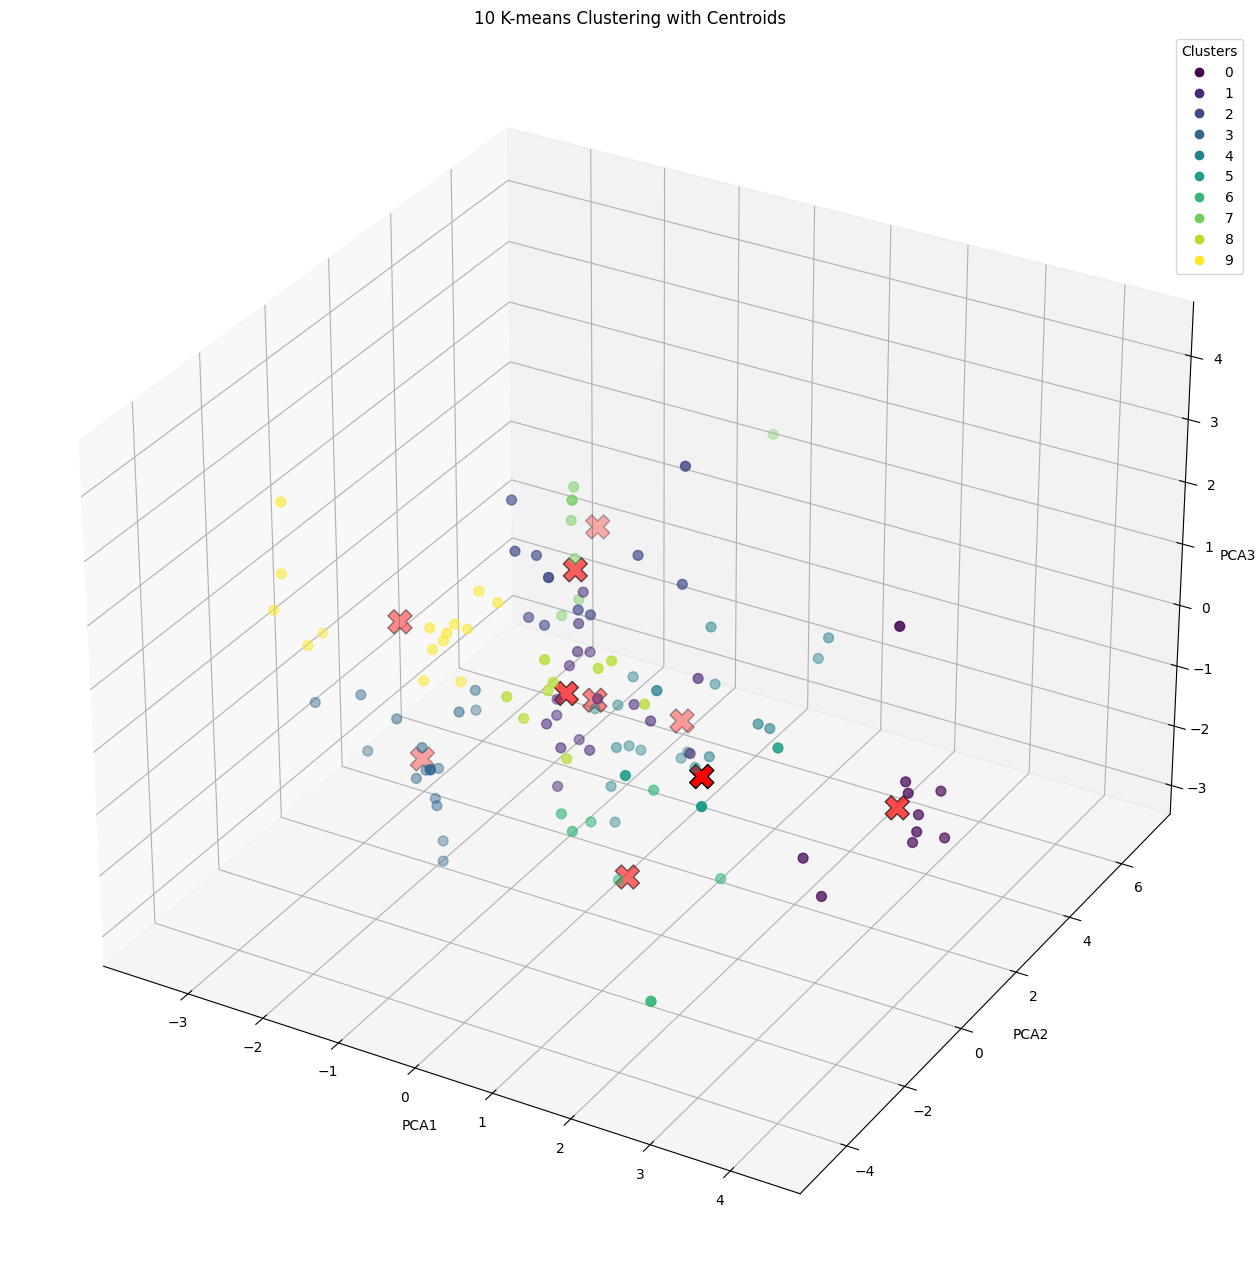

In [121]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib as mpl
import matplotlib.patches as mpatches

# Fit KMeans with 10 clusters
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(data[['PCA1', 'PCA2', 'PCA3']])
labels = kmeans.predict(data[['PCA1', 'PCA2', 'PCA3']])
centroids = kmeans.cluster_centers_

# Plotting the clusters in 3D
fig = plt.figure(figsize=(16, 20))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the data points, coloring by rank
scatter = ax.scatter(data['PCA1'], data['PCA2'], data['PCA3'], c=labels, cmap='viridis', s=50)

# Scatter plot for the centroids, making them larger and distinct in color
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], 
           c='red', s=300, marker='X', edgecolor='black', label='Centroids')

# Label the axes
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title('10 K-means Clustering with Centroids')

# Create a legend
legend_elements = [mpatches.Patch(label='Centroids', color='red')]
ax.legend(handles=legend_elements)

#add the clusters to the legend
plt.legend(*scatter.legend_elements(), title='Clusters')



plt.show()

#### Showing how Ranks are related to these clustered centroids

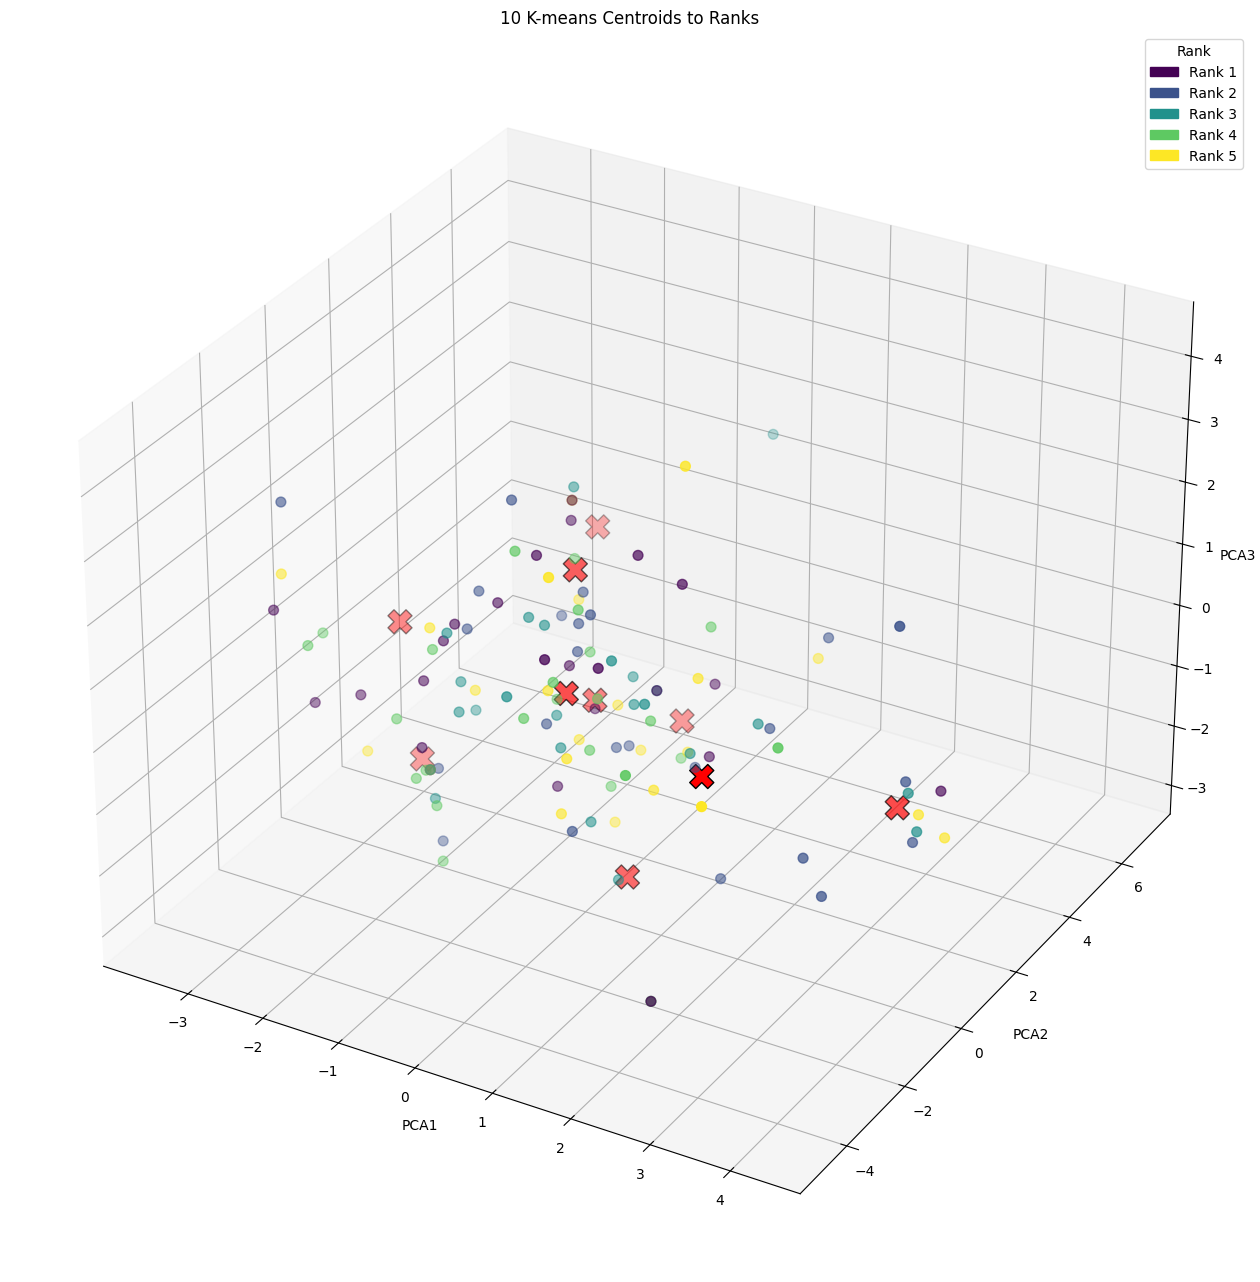

In [122]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib as mpl
import matplotlib.patches as mpatches

# Fit KMeans with 10 clusters
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(data[['PCA1', 'PCA2', 'PCA3']])
labels = kmeans.predict(data[['PCA1', 'PCA2', 'PCA3']])
centroids = kmeans.cluster_centers_

# Define the ranks (assumed to be in 'rank' column in df)
ranks = df['rank'].unique()

# Plotting the clusters in 3D
fig = plt.figure(figsize=(16, 20))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the data points, coloring by rank
scatter = ax.scatter(data['PCA1'], data['PCA2'], data['PCA3'], c=df['rank'], cmap='viridis', s=50)

# Scatter plot for the centroids, making them larger and distinct in color
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], 
           c='red', s=300, marker='X', edgecolor='black', label='Centroids')

# Label the axes
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title('10 K-means Centroids to Ranks')

# Add a color bar for ranks
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Rank')

# Manually create legend patches based on unique ranks and corresponding colors from colormap
cmap = plt.cm.viridis
norm = mpl.colors.Normalize(vmin=min(df['rank']), vmax=max(df['rank']))

# Create custom legend entries for each rank
legend_patches = [mpatches.Patch(color=cmap(norm(rank)), label=f'Rank {rank}') for rank in ranks]

# Add a legend for ranks
ax.legend(handles=legend_patches, title="Rank", loc='upper right')

#remove the color bar
cbar.remove()

plt.show()

## Hierarchial Clustering

In [123]:
df

,PCA1,PCA2,PCA3,rank
0,2.090918,-3.181196,-2.669214,1
1,-0.381021,0.052100,-1.569145,1
2,-1.800961,-0.788761,-0.012953,1
3,-3.222997,-0.907255,-0.832984,1
4,0.772457,2.434955,-0.486496,1
...,...,...,...,...
115,1.436189,-0.362798,4.319361,5
116,3.298162,-4.710600,1.565845,5
117,1.447785,0.056472,0.846098,5
118,-0.448996,-0.020773,1.806847,5


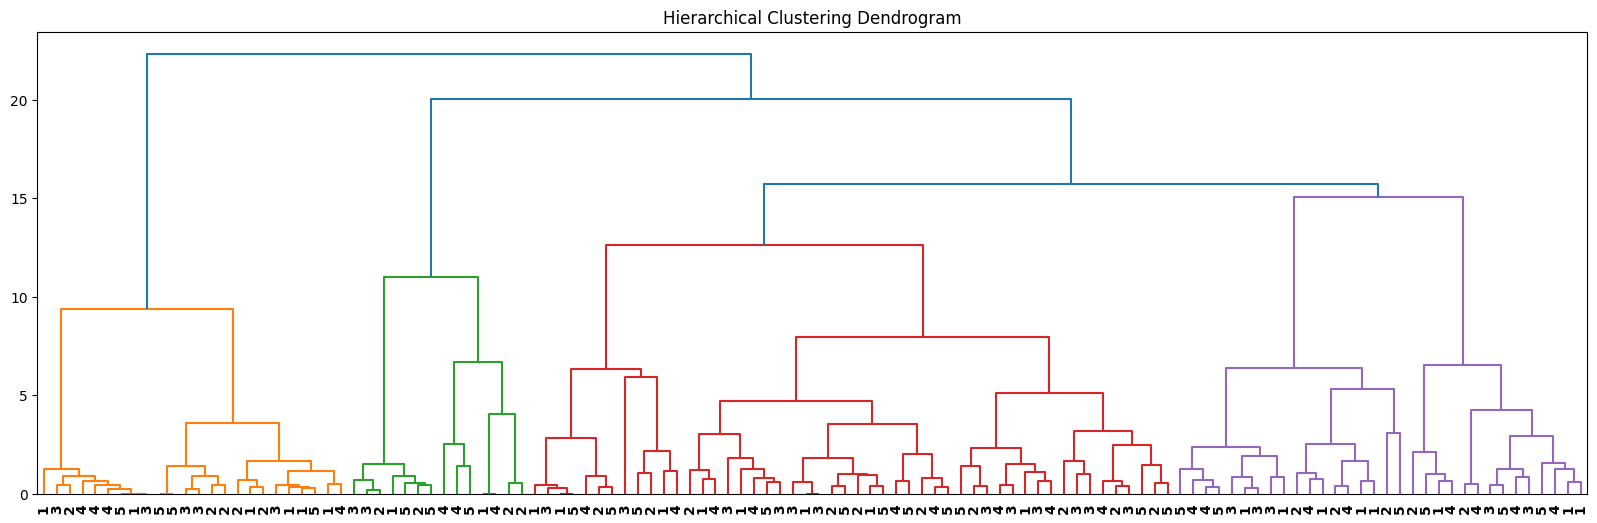

In [131]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# saving the labels of the rank column but removing it to perform the clustering
X = df.drop(columns='rank').values  # Features used for clustering
rank_labels = df['rank'].values  # Rank column used for dendrogram labels

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.figure(figsize=(20, 6))
plt.title("Hierarchical Clustering Dendrogram")
# plot the dendrogram with labels from the 'rank' column
plot_dendrogram(model, truncate_mode="level", p=10, labels=rank_labels)

#bold the x-axis labels
plt.xticks(fontsize=10, fontweight='bold')

plt.show()


#### DBSCAN Clustering

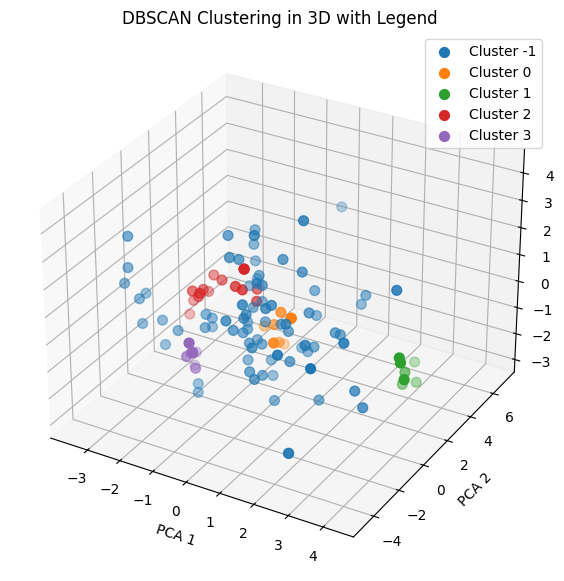

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Assuming df is your DataFrame and it has ['PCA1', 'PCA2', 'PCA3', 'rank']
X_scaled = df[['PCA1', 'PCA2', 'PCA3']]  # The three PCA components
rank_labels = df['rank']  # The original labels

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.7325, min_samples=5)  # You may need to tune eps and min_samples
dbscan_labels = dbscan.fit_predict(X_scaled)

# Add the cluster labels to the DataFrame
df['dbscan_cluster'] = dbscan_labels

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot DBSCAN clusters with a legend
unique_clusters = np.unique(dbscan_labels)
for cluster in unique_clusters:
    cluster_points = df[df['dbscan_cluster'] == cluster]
    ax.scatter(cluster_points['PCA1'], cluster_points['PCA2'], cluster_points['PCA3'], 
               label=f'Cluster {cluster}', s=50)  # Use label to add to the legend

# Labeling the axes
ax.set_title("DBSCAN Clustering in 3D with Legend")
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')

# Show legend
ax.legend()

plt.show()

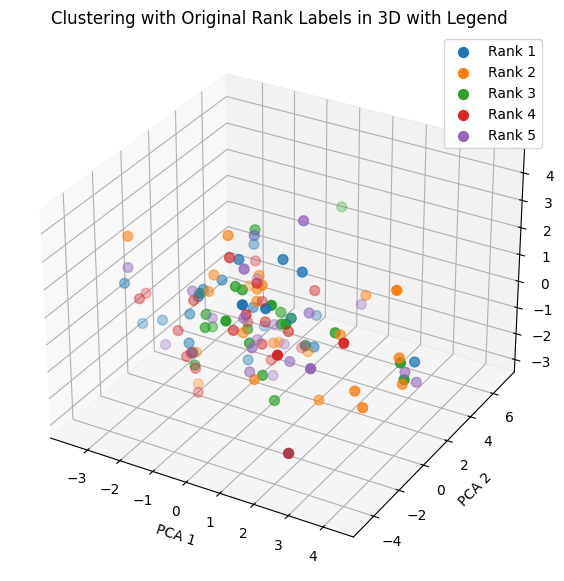

In [126]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot original rank labels with a legend
unique_ranks = np.unique(rank_labels)
for rank in unique_ranks:
    rank_points = df[df['rank'] == rank]
    ax.scatter(rank_points['PCA1'], rank_points['PCA2'], rank_points['PCA3'], 
               label=f'Rank {rank}', s=50)  # Use label to add to the legend

# Labeling the axes
ax.set_title("Clustering with Original Rank Labels in 3D with Legend")
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')

# Show legend
ax.legend()

plt.show()